Introducción:

Breve descripción del proyecto y su objetivo.
Descripción del conjunto de datos utilizado (fuente, número de registros, columnas relevantes, etc.).
Exploración de datos:

Análisis inicial del DataFrame, incluyendo la visualización de las primeras filas, información sobre las columnas y estadísticas descriptivas básicas.
Identificación de posibles problemas de calidad de datos, como valores faltantes, duplicados, outliers, etc.
Limpieza de datos:

Pasos detallados para abordar los problemas identificados durante la exploración de datos.
Código Python utilizado para limpiar y transformar el DataFrame, con explicaciones detalladas de cada paso.
Análisis adicional:

Exploración adicional de los datos limpios y transformados, incluyendo visualizaciones si es necesario.
Respuestas a las preguntas planteadas al comienzo del proyecto, utilizando los datos limpios.
Conclusiones:

Resumen de los hallazgos del proyecto y cómo se abordaron los problemas de calidad de datos.
Reflexión sobre el proceso de limpieza y transformación de datos, así como posibles áreas de mejora.
Referencias:

Enlaces a cualquier recurso utilizado durante el proyecto, como documentación de pandas, tutoriales, etc.
Asegúrate de incluir comentarios claros en tu código, así como títulos y subtítulos descriptivos en tu notebook para mejorar la legibilidad y comprensión del proyecto. Esto ayudará a demostrar tus habilidades de programación en Python y tu capacidad para abordar problemas reales de limpieza y transformación de datos.

# ETL process for the FIFA 21 messy, raw dataset

Source/Fuente: https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring

## Introduction and Objectives/Introducción y objetivos

This dataset contains "raw" information about players within the same organization. It encompasses various variables describing different player characteristics. The aim of this notebook is to conduct cleaning and transformation of the dataset, enabling, among other tasks, data analysis of the same dataset.

Este conjunto de datos alberga información "cruda" (raw) acerca de jugadores dentro de la misma organización. En su contenido, se encuentran diversas variables que describen diferentes características de cada jugador. El propósito de este notebook es llevar a cabo una limpieza y transformación de este dataset, con el objetivo de facilitar, entre otras cosas, un análisis de datos más eficaz.



In [1]:
# Import library/Importamos las librerías

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# En caso de usar Jupyter Notebook ejecutar esta linea para mostrar los gráficos

# %matplotlib inline

In [3]:
#Definimos parámetros comunes de nuestros gráficos

sns.set_style(style='dark')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (16, 9)

## Data Load/Carga de datos

In [4]:
# Read the df/leer el df

data_raw = pd.read_csv('/work/fifa21 raw data v2.csv')
data_raw.head()

/tmp/ipykernel_629/794902129.py:3: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('/work/fifa21 raw data v2.csv')


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


## Descripción del conjunto de datos utilizado.

In [5]:
# observamos todos los registros en forma de texto

#with se encarga de que todos los recursos se liberen una vez ejecutada la celda
with pd.option_context('display.max_columns', None, 'display.max_colwidth', None):
    
    # Dentro de este bloque, se mostrarán todas las columnas y el contenido completo de cada celda
    print(data_raw.head())

       ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                                            playerUrl  \
0                http://sofifa.com/player/158023/lionel-messi/210006/   
1  http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210006/   
2                   http://sofifa.com/player/200389/jan-oblak/210006/   
3   

In [6]:
# Obtain the dimensions of the df/ Obtenemos las dimensiones del df

data_raw.shape

(18979, 77)

In [7]:
data_raw.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [8]:
# visualize the number, name, and type of data contained in our dataframe/Visualizamos el número, nombre y tipo de datos que contiene nuestro dataframe

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

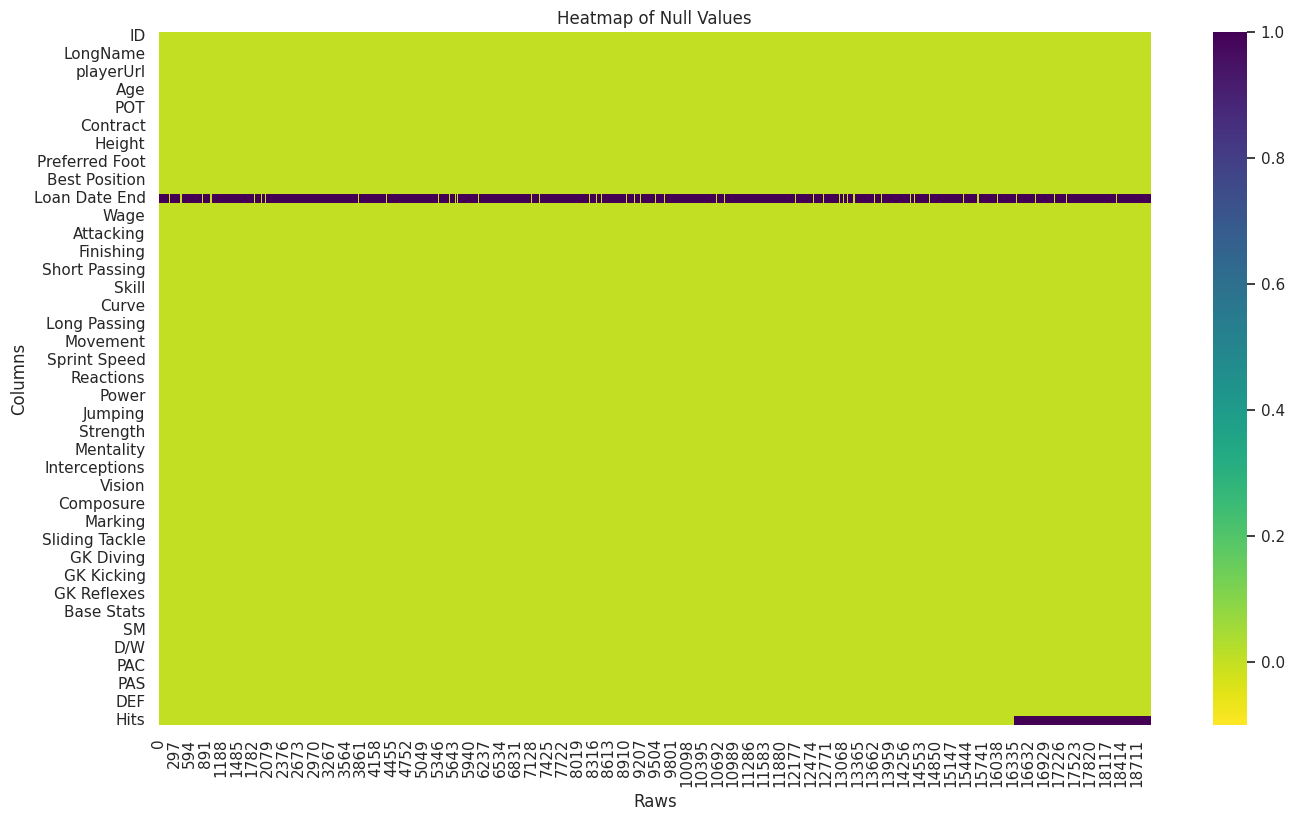

In [9]:
# Visualization of null values/Visualización de valores nulos
# Colores en sns: https://seaborn.pydata.org/tutorial/color_palettes.html

(
    data_raw
    .isnull()
    .transpose()
    .pipe(
        lambda df:(
            sns.heatmap(
                data=df,
                cmap='viridis_r',
                vmax=0,
                vmin=1
            )
        )
    )
)

# Añadimos título y etiquetas

plt.title('Heatmap of Null Values')
plt.xlabel('Raws')
plt.ylabel('Columns')

#Mostramos el gráfico

plt.show()

Based on this, and certain prior considerations, assuming that we will carry out an exploratory data analysis, we will remove the columns with IDs 3, 4, 8, 10, 11, 15, 16, 18, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75 and 76. We are removing these specific columns based on certain criteria or prior considerations, such as the relevance of the variables to our analysis or the quality of the data. This will allow us to focus on the most important and meaningful characteristics of our data during the exploratory analysis.

Basado en esto y en ciertas consideraciones previas, suponiendo que llevaremos a cabo un análisis exploratorio de datos, eliminaremos las columnas con los ID 3, 4, 8, 10, 11, 15, 16, 18, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75 y 76. Estamos eliminando estas columnas específicas basadas en ciertos criterios o consideraciones previas, como la relevancia de las variables para nuestro análisis o la calidad de los datos. Esto nos permitirá centrarnos en las características más importantes y significativas de nuestros datos durante el análisis exploratorio.

In [10]:
# Drop columns/Eliminar columnas

columns_to_drop = [3, 4, 8, 10, 11, 15, 16, 18, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]

data_raw.drop(columns=data_raw.columns[columns_to_drop], inplace=True)

In [11]:
# Observe the dimensions of the DataFrame after drop/Observamos las dimensiones del df después del borrado

data_raw.shape

(18979, 17)

In [12]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              18979 non-null  int64 
 1   Name            18979 non-null  object
 2   LongName        18979 non-null  object
 3   Nationality     18979 non-null  object
 4   Age             18979 non-null  int64 
 5   ↓OVA            18979 non-null  int64 
 6   Club            18979 non-null  object
 7   Height          18979 non-null  object
 8   Weight          18979 non-null  object
 9   Preferred Foot  18979 non-null  object
 10  Joined          18979 non-null  object
 11  Value           18979 non-null  object
 12  Wage            18979 non-null  object
 13  Release Clause  18979 non-null  object
 14  Finishing       18979 non-null  int64 
 15  Sprint Speed    18979 non-null  int64 
 16  Base Stats      18979 non-null  int64 
dtypes: int64(6), object(11)
memory usage: 2.5+ MB


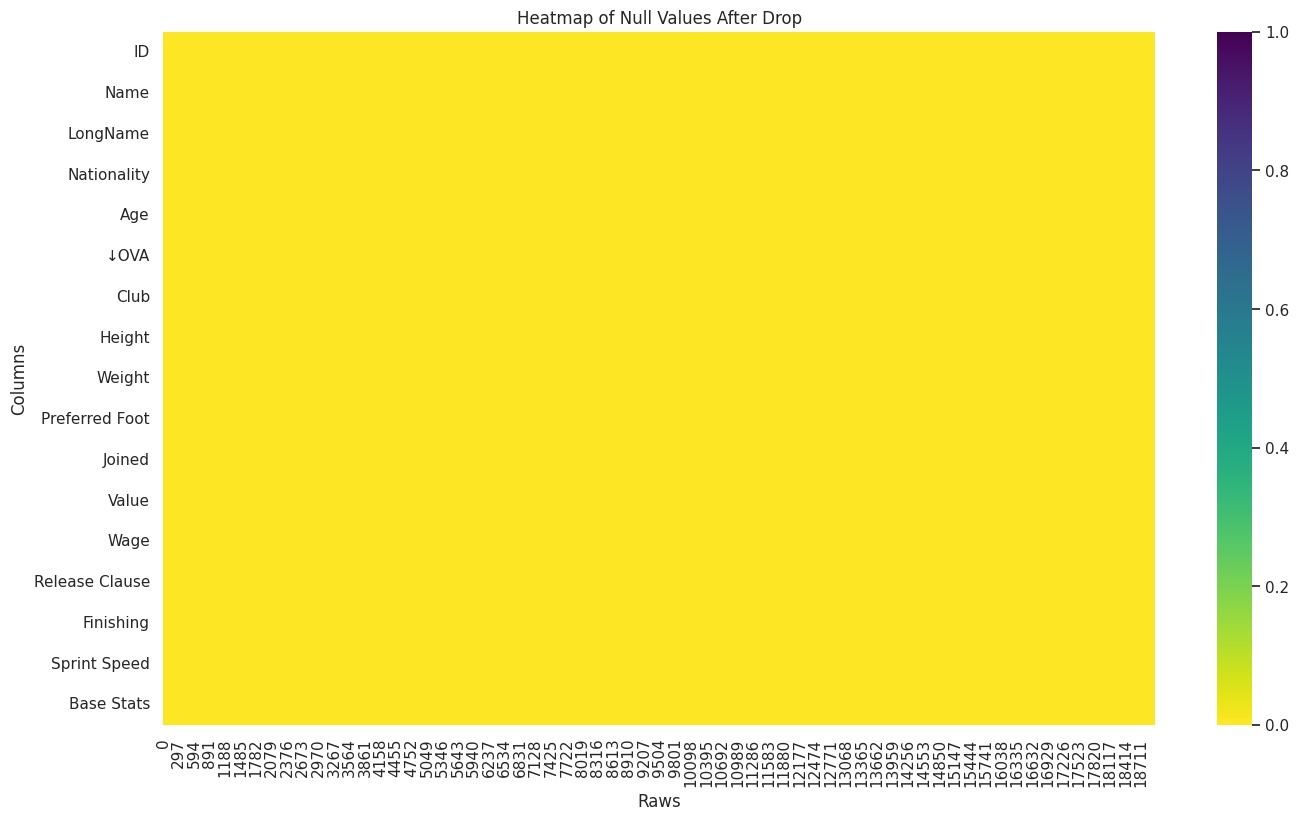

In [13]:
# Visualization of null values after drop/Visualización de valores nulos después del borrado 

(
    data_raw
    .isnull()
    .transpose()
    .pipe(
        lambda df:(
            sns.heatmap(
                data=df,
                cmap='viridis_r',
                vmax=1,
                vmin=0
            )
        )
    )
)

# Añadimos título y etiquetas

plt.title('Heatmap of Null Values After Drop')
plt.xlabel('Raws')
plt.ylabel('Columns')

#Mostramos el gráfico

plt.show()

## Data transform/Transformación de datos


### 1. Conversion of the 'Height' and 'Weight' columns to numeric form./Conversión de las columnas 'Height' y 'Weight' a forma numérica.

In [14]:
# Due to the method we will use, we will convert the data to string type
# Por el método que usaremos, convertiremos los datos a tipo cadena

data_raw = (
    data_raw
    .astype({
        'Height':'string',
        'Weight':'string'
    })
)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              18979 non-null  int64 
 1   Name            18979 non-null  object
 2   LongName        18979 non-null  object
 3   Nationality     18979 non-null  object
 4   Age             18979 non-null  int64 
 5   ↓OVA            18979 non-null  int64 
 6   Club            18979 non-null  object
 7   Height          18979 non-null  string
 8   Weight          18979 non-null  string
 9   Preferred Foot  18979 non-null  object
 10  Joined          18979 non-null  object
 11  Value           18979 non-null  object
 12  Wage            18979 non-null  object
 13  Release Clause  18979 non-null  object
 14  Finishing       18979 non-null  int64 
 15  Sprint Speed    18979 non-null  int64 
 16  Base Stats      18979 non-null  int64 
dtypes: int64(6), object(9), string(2)
memory usage: 2.

In [15]:
#  Displaying the data from the columns/Mostramos los datos de las columnas

data_raw[['Height','Weight']].sample(10)

,Height,Weight
3013,180cm,70kg
5911,175cm,70kg
13648,188cm,72kg
12347,183cm,73kg
13771,183cm,83kg
17074,184cm,74kg
4680,178cm,76kg
678,186cm,75kg
2908,182cm,60kg
11149,168cm,50kg


Aquí podemos ver que Height y Weight son cadenas de texto y contienen tanto números como letras

In [16]:
# rename the columns to specify the units that each variable handles, for Height CM and for Weight KG
# Renombramos las columnas para que especifiquen las unidades que maneja cada variable, para la Altura CM y para el Peso KG

data_raw = (
    data_raw
    .rename(
        columns={
            'Height':'Height(cm)',
            'Weight':'Weight(kg)'
        }
    )
)

In [17]:
# Create a function to extract the numbers from the DataFrame/Creamos una función que extraiga los numeros del df

def extract_numbers(string):
    num = ''.join(filter(str.isdigit,string))
    return num

In [18]:
# Apply the function to the Height column/Aplicamos la función a la columna Height

data_raw['Height(cm)'] = data_raw['Height(cm)'].apply(extract_numbers)
data_raw['Height(cm)'].head()

0    170
1    187
2    188
3    181
4    175
Name: Height(cm), dtype: object

In [19]:
# Apply the function to the Weight column/Aplicamos la función a la columna Weight

data_raw['Weight(kg)'] = data_raw['Weight(kg)'].apply(extract_numbers)
data_raw['Weight(kg)'].head()

0    72
1    83
2    87
3    70
4    68
Name: Weight(kg), dtype: object

In [20]:
# Convert the data to integer type/Convertimos los datos a tipo int

data_raw = (
    data_raw
    .astype({
        'Height(cm)':'int64',
        'Weight(kg)':'int64'
    })
)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              18979 non-null  int64 
 1   Name            18979 non-null  object
 2   LongName        18979 non-null  object
 3   Nationality     18979 non-null  object
 4   Age             18979 non-null  int64 
 5   ↓OVA            18979 non-null  int64 
 6   Club            18979 non-null  object
 7   Height(cm)      18979 non-null  int64 
 8   Weight(kg)      18979 non-null  int64 
 9   Preferred Foot  18979 non-null  object
 10  Joined          18979 non-null  object
 11  Value           18979 non-null  object
 12  Wage            18979 non-null  object
 13  Release Clause  18979 non-null  object
 14  Finishing       18979 non-null  int64 
 15  Sprint Speed    18979 non-null  int64 
 16  Base Stats      18979 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 2.5+ MB


### 2. Eliminación de caracteres de nueva línea en todas las columnas.

Eliminación de caracteres de nueva línea en todas las columnas.

In [21]:
# Apply a lambda function to remove the newline characters/Aplicamos una lambda para eliminar los saltos de linea

data_raw = (
    data_raw
    .applymap(
        lambda x: x.strip() if isinstance(x,str) else x
    )
)

# Apply a lambda function to remove spaces within the strings/Aplicamos una lambda para eliminar los espacios en las cadenas

data_raw = (
    data_raw
    .applymap(
        lambda x: x.lstrip() if isinstance(x,str) else x
    )
)

data_raw.head()

/tmp/ipykernel_629/1796115010.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_raw
/tmp/ipykernel_629/1796115010.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_raw


,ID,Name,LongName,Nationality,Age,↓OVA,Club,Height(cm),Weight(kg),Preferred Foot,Joined,Value,Wage,Release Clause,Finishing,Sprint Speed,Base Stats
0,158023,L. Messi,Lionel Messi,Argentina,33,93,FC Barcelona,170,72,Left,"Jul 1, 2004",€103.5M,€560K,€138.4M,95,80,466
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,Juventus,187,83,Right,"Jul 10, 2018",€63M,€220K,€75.9M,95,91,464
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,Atlético Madrid,188,87,Right,"Jul 16, 2014",€120M,€125K,€159.4M,11,60,489
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,Manchester City,181,70,Right,"Aug 30, 2015",€129M,€370K,€161M,82,76,485
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,Paris Saint-Germain,175,68,Right,"Aug 3, 2017",€132M,€270K,€166.5M,87,89,451


### 3. Conversión de columnas de tipo string ('Value', 'Wage'y 'Release') a números.

#### 3.1 Convertir 'Value a numeros'

In [22]:
data_raw['Value'].sample(10)

14330     €525K
15156     €600K
13345     €975K
13517     €275K
2621      €3.2M
1152       €12M
128      €35.5M
18057     €230K
741        €21M
14202     €725K
Name: Value, dtype: object

In [23]:
# Rename the columns/Renombramos las columnas

data_raw = (
    data_raw
    .rename(
        columns={
            'Value':'Value(M)'
        }
    )
)

In [24]:
# Eliminamos el símbolo de euros

data_raw['Value(M)'] = (
    data_raw['Value(M)']
    .apply(
        lambda x: x.lstrip('€') if isinstance(x, str) else x
    )
)

data_raw['Value(M)'].sample(10)


17731      350K
4859       1.3M
3656       2.8M
18       114.5M
12871        1M
3289         2M
8926       925K
76          58M
17107      375K
15733      600K
Name: Value(M), dtype: object

In [25]:
def millions(arr):
    if 'K' in arr:
      arr = float(arr.replace('K',''))
      return arr/1000
    elif 'M' in arr:
      arr = float(arr.replace('M',''))
      return arr
    else:
      return arr

In [26]:
data_raw['Value(M)'] = data_raw['Value(M)'].apply(millions)

# data_raw.sample(10)

In [27]:
data_raw = (
    data_raw
    .astype({
        'Value(M)':'float64'
    })
)

data_raw.sample(10)

,ID,Name,LongName,Nationality,Age,↓OVA,Club,Height(cm),Weight(kg),Preferred Foot,Joined,Value(M),Wage,Release Clause,Finishing,Sprint Speed,Base Stats
11628,237498,T. Figueroa,Tony Figueroa,Mexico,21,64,Pachuca,172,55,Left,"Jul 24, 2018",1.400,€3K,€1.5M,58,70,320
2206,230240,Ramón da Almeyda,Ramón Samuel da Almeyda Aníbal,Brazil,24,74,Vasco da Gama,178,80,Left,"Jan 1, 2019",4.400,€11K,€10.5M,44,69,405
7989,232382,T. Takagi,Toshiyuki Takagi,Japan,29,67,Cerezo Osaka,170,64,Right,"Jan 5, 2018",1.000,€3K,€975K,66,73,361
16435,229779,L. Edwards,Liam Edwards,England,23,58,Bolton Wanderers,190,80,Right,"Jun 25, 2018",0.425,€2K,€351K,25,55,291
7320,217086,C. Amissi,Cedric Amissi,Burundi,30,68,Al Taawoun,172,70,Right,"Jul 1, 2017",1.200,€10K,€1.4M,66,76,406
7137,240846,E. Apeh,Emmanuel Apeh,Nigeria,23,68,CD Tenerife,183,83,Right,"Aug 5, 2020",2.700,€5K,€2.5M,67,72,345
16620,245475,D. Pakulski,Dawid Pakulski,Poland,21,58,Zagłębie Lubin,174,66,Right,"Nov 16, 2017",0.450,€1K,€310K,45,65,314
11566,239023,B. Wiles,Ben Wiles,England,21,64,Rotherham United,172,66,Right,"Jun 1, 2017",1.300,€7K,€1.6M,53,71,384
17391,258286,A. Preciado,Adonis Preciado,Ecuador,23,56,Barcelona Sporting Club,174,70,Left,"Jul 10, 2020",0.230,€500,€282K,50,70,299
11996,213765,F. Michel,Felix Michel,Lebanon,25,63,AIK,189,83,Right,"Jul 25, 2019",0.650,€2K,€596K,45,56,356


In [28]:
data_raw['Wage'].sample(10)

9664     €500
12853     €2K
5779      €5K
16942    €650
569      €13K
13913    €800
18064    €500
12211     €2K
11725    €500
15976    €700
Name: Wage, dtype: object

In [29]:
# data_raw = (
#     data_raw
#     .set_index(
#         'ID',
#         inplace=True
#     )
# )

In [30]:
data_raw['Release Clause'].sample(10)

16233    €558K
4729     €3.5M
6928       €1M
18788    €124K
5684     €1.7M
8406       €2M
11856    €748K
10507    €808K
9762     €1.3M
8647     €1.1M
Name: Release Clause, dtype: object

In [31]:
#Eliminamos el simbolo de euros

data_raw['Wage'] = (
    data_raw['Wage']
    .apply(
        lambda x: x.lstrip('€')
    )
)

data_raw['Wage'].sample(10)

13435    500
11819     3K
18386    500
15857     1K
3835      5K
14574     1K
16583    650
16321    500
3164     16K
11570     2K
Name: Wage, dtype: object

In [32]:
def kilos(arr):
    if 'K' in arr:
        arr = float(arr.replace('K', ''))
        return arr
    else:
        arr = float(arr) / 1000
        return arr


In [33]:
data_raw['Wage'] = (
    data_raw['Wage']
    .apply(
        kilos
    )
)

data_raw['Wage'].sample(10)

9971      3.00
3392     26.00
8266      5.00
15574     0.75
8652      2.00
2300     29.00
1758     46.00
5591      3.00
13934     0.65
10772     1.00
Name: Wage, dtype: float64

In [34]:
data_raw['Wage'].sample(20)

2679      8.0
928      52.0
18863     0.5
5382     17.0
4079      2.0
5359      8.0
14536     0.5
10332     4.0
3304     14.0
6370      0.5
6752      4.0
13587     2.0
8232      0.5
14029     1.0
1182     29.0
4563      5.0
4364      8.0
16969     7.0
7284      3.0
9837      1.0
Name: Wage, dtype: float64

Split joined column

In [35]:
# Convertimos nuestra columna de fechas a datetime

data_raw['Joined'] = pd.to_datetime(data_raw['Joined'])
data_raw['Joined'].sample(10)

8402    2017-07-01
15854   2013-01-16
11371   2020-07-01
9391    2016-01-01
15596   2017-02-07
12654   2018-01-01
3349    2019-01-01
16713   2019-12-01
12098   2019-07-01
14428   2020-01-04
Name: Joined, dtype: datetime64[ns]

In [36]:
#Extraemos el año

data_raw['Joined(year)'] = data_raw['Joined'].dt.year
data_raw['Joined(year)'].sample(10)

11709    2017
7448     2018
2993     2017
10465    2020
9240     2019
11526    2020
6184     2020
12394    2017
18469    2020
17408    2019
Name: Joined(year), dtype: int32

In [37]:
# Extraemos el mes

data_raw['Joined(month)'] = data_raw['Joined'].dt.month
data_raw['Joined(month)'].sample(10)

7782     1
18007    7
4220     8
7811     7
3559     7
3011     1
907      7
4258     8
10154    6
2257     1
Name: Joined(month), dtype: int32

In [38]:
#Extraemos el día

data_raw['Joined(day)'] = data_raw['Joined'].dt.day
data_raw['Joined(day)'].sample(10)

17634    17
12319     1
17608    27
8404     13
10081    24
6714      1
5244      1
12477     1
309      31
15301     1
Name: Joined(day), dtype: int32

In [39]:
data_procesed = data_raw
data_procesed

,ID,Name,LongName,Nationality,Age,↓OVA,Club,Height(cm),Weight(kg),Preferred Foot,Joined,Value(M),Wage,Release Clause,Finishing,Sprint Speed,Base Stats,Joined(year),Joined(month),Joined(day)
0,158023,L. Messi,Lionel Messi,Argentina,33,93,FC Barcelona,170,72,Left,2004-07-01,103.50,560.0,€138.4M,95,80,466,2004,7,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,Juventus,187,83,Right,2018-07-10,63.00,220.0,€75.9M,95,91,464,2018,7,10
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,Atlético Madrid,188,87,Right,2014-07-16,120.00,125.0,€159.4M,11,60,489,2014,7,16
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,Manchester City,181,70,Right,2015-08-30,129.00,370.0,€161M,82,76,485,2015,8,30
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,Paris Saint-Germain,175,68,Right,2017-08-03,132.00,270.0,€166.5M,87,89,451,2017,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,China PR,21,47,Wuhan Zall,178,66,Right,2018-07-13,0.10,1.0,€70K,26,60,255,2018,7,13
18975,258760,B. Hough,Ben Hough,England,17,47,Oldham Athletic,175,65,Right,2020-08-01,0.13,0.5,€165K,42,64,281,2020,8,1
18976,252757,R. McKinley,Ronan McKinley,England,18,47,Derry City,179,74,Right,2019-03-08,0.12,0.5,€131K,34,66,285,2019,3,8
18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,Dalian YiFang FC,175,69,Right,2020-09-22,0.10,2.0,€88K,52,55,271,2020,9,22


In [40]:
#RENOMBRAR COLUMNAS PARA ESTANDARIZAR
#####PENDIENTE######

data_raw.rename(columns={'Preferred Foot':'preferred_foot'},inplace=True) #inplace para que se aplique en el df original
data_raw.sample(10)


,ID,Name,LongName,Nationality,Age,↓OVA,Club,Height(cm),Weight(kg),preferred_foot,Joined,Value(M),Wage,Release Clause,Finishing,Sprint Speed,Base Stats,Joined(year),Joined(month),Joined(day)
6490,183336,P. Helland,Pål André Helland,Norway,30,68,Rosenborg BK,186,84,Left,2013-07-15,1.200,4.0,€1.1M,62,71,389,2013,7,15
17933,194944,C. Sosa,Christian Sosa,Paraguay,32,54,River Plate Asunción,183,82,Right,2020-01-07,0.080,0.5,€108K,59,66,331,2020,1,7
11179,245336,M. Kilman,Max Kilman,England,23,64,Wolverhampton Wanderers,195,80,Left,2018-08-09,1.200,12.0,€1.5M,36,65,357,2018,8,9
1942,171828,I. Scocco,Ignacio Scocco,Argentina,35,75,Newell's Old Boys,177,73,Right,2020-07-07,2.400,13.0,€4.7M,78,70,405,2020,7,7
16758,258844,N. Sansotre,Nicolás Sansotre,Argentina,26,57,Club Atlético Tigre,180,75,Right,2020-08-29,0.180,2.0,€168K,20,58,292,2020,8,29
7224,175589,Feng Xiaoting,Xiaoting Feng,China PR,34,68,Shanghai Greenland Shenhua FC,186,78,Right,2011-01-01,0.400,9.0,€0,34,47,349,2011,1,1
18418,258401,S. Núñez,Sergio Núñez,Uruguay,20,52,Peñarol,175,73,Right,2020-07-01,0.190,0.5,€311K,55,65,279,2020,7,1
9326,176585,I. Pallas,Ignacio Pallas,Uruguay,37,66,Centro Atlético Fénix,193,87,Right,2020-01-10,0.150,0.5,€280K,43,40,316,2020,1,10
2225,183141,Oier,Oier Olazábal Paredes,Spain,30,74,RCD Espanyol,190,91,Left,2020-01-31,2.800,7.0,€5.7M,14,43,409,2020,1,31
14337,224132,D. Gómez,Darwin Gómez,Venezuela,28,61,AC Mineros de Guayana,182,80,Right,2019-01-03,0.325,0.5,€538K,55,74,331,2019,1,3


#### Cambiar tipo de datos a 0 y 1

¿Se pueden normalizar los valores en algunas columnas para facilitar el análisis (por ejemplo, escalando los valores entre 0 y 1)?

In [41]:
#Creamos una lambda para reemplazar 'Right' por 0 y 'Left' por 1

data_raw = (
    data_raw
    .assign(
        numeric_pf= lambda d: d.preferred_foot.replace(['Right','Left'],[int(0),int(1)]
    ))
)

data_raw

,ID,Name,LongName,Nationality,Age,↓OVA,Club,Height(cm),Weight(kg),preferred_foot,...,Value(M),Wage,Release Clause,Finishing,Sprint Speed,Base Stats,Joined(year),Joined(month),Joined(day),numeric_pf
0,158023,L. Messi,Lionel Messi,Argentina,33,93,FC Barcelona,170,72,Left,...,103.50,560.0,€138.4M,95,80,466,2004,7,1,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,Juventus,187,83,Right,...,63.00,220.0,€75.9M,95,91,464,2018,7,10,0
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,Atlético Madrid,188,87,Right,...,120.00,125.0,€159.4M,11,60,489,2014,7,16,0
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,Manchester City,181,70,Right,...,129.00,370.0,€161M,82,76,485,2015,8,30,0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,Paris Saint-Germain,175,68,Right,...,132.00,270.0,€166.5M,87,89,451,2017,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,China PR,21,47,Wuhan Zall,178,66,Right,...,0.10,1.0,€70K,26,60,255,2018,7,13,0
18975,258760,B. Hough,Ben Hough,England,17,47,Oldham Athletic,175,65,Right,...,0.13,0.5,€165K,42,64,281,2020,8,1,0
18976,252757,R. McKinley,Ronan McKinley,England,18,47,Derry City,179,74,Right,...,0.12,0.5,€131K,34,66,285,2019,3,8,0
18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,Dalian YiFang FC,175,69,Right,...,0.10,2.0,€88K,52,55,271,2020,9,22,0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=39ee0769-0977-4025-b403-d8e7fd55c200' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>